In [170]:
# Import libraries and modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

from sklearn.utils.multiclass import unique_labels


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from PIL import Image
import numpy as np
# For reproducibility
np.random.seed(42)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.utils import np_utils, to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import ReduceLROnPlateau
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean

## Part 1: Convert images to arrays for the Convolutional Neural Net Model

In [171]:
#read in csv
data = pd.read_csv('./fashionmnist/fashion-mnist_train.csv')
data.head(20)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [172]:
data.iloc[51_000]

label       7
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
pixel29     0
           ..
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 51000, Length: 785, dtype: int64

In [173]:
data['label'] == 6

0        False
1        False
2         True
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
59970    False
59971    False
59972    False
59973    False
59974    False
59975    False
59976    False
59977    False
59978     True
59979    False
59980    False
59981    False
59982    False
59983    False
59984    False
59985     True
59986     True
59987    False
59988    False
59989    False
59990    False
59991    False
59992    False
59993    False
59994    False
59995    False
59996    False
59997    False
59998    False
59999    False
Name: label, Length: 60000, dtype: bool

In [174]:
first_image = pd.Series(data.iloc[51_000 ,1:]).values.reshape(28,28)

In [175]:
for x in range(len(data['label'])):
    pd.Series(data.iloc[x ,1:]).values.reshape(28,28)

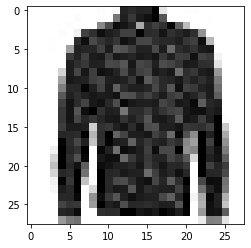

In [176]:
plt.imshow(pd.Series(data.iloc[59986,1:]).values.reshape(28,28), cmap='binary')

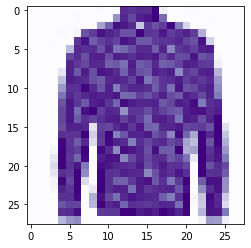

In [177]:
plt.imshow(pd.Series(data.iloc[59986,1:]).values.reshape(28,28), cmap='Purples')

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [179]:
cm = LinearSegmentedColormap.from_list(
        'pink', ['#FDDFDF','#FFFFFF'], N=10)

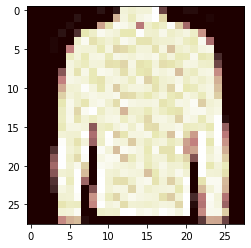

In [180]:
plt.imshow(pd.Series(data.iloc[59986,1:]).values.reshape(28,28), cmap='pink')

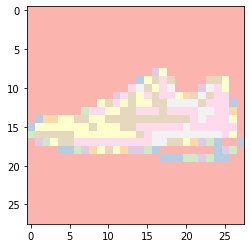

In [181]:
plt.imshow(first_image, cmap= 'Pastel1')

In [182]:
data.shape

(60000, 785)

In [183]:
len(data['label'])

60000

## Create X, y data frame

In [184]:
#set size of images to be scaled to
row = 28
col= 28

## Part 3: Build CNN

In [185]:
print(type(data.iloc[:, 0]))

<class 'pandas.core.series.Series'>


In [186]:
#pandas dataframe to np.array
X = np.array(data.iloc[:, 1:])
y = to_categorical(np.array(data.iloc[:, 0]))

In [187]:
X = X.reshape(60_000, row, col, 1)

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size = .30 )

print(type(X_test))

<class 'numpy.ndarray'>


In [189]:
# Make sure each value is a float. (Otherwise, we get an error.)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# The current range of X_train and X_test is 0 to 255.
# The code below is equivalent to X_train = X_train / 255.
# This scales each value to be between 0 and 1.
X_train /= 255
X_test /= 255

In [190]:
X_train.shape

(42000, 28, 28, 1)

In [191]:
X_test.shape

(18000, 28, 28, 1)

In [192]:
# # Change y_train.
# y_train = np_utils.to_categorical(y_train, 10)
# y_test = np_utils.to_categorical(y_test, 10)

In [193]:
y_train.shape

(42000, 10)

In [194]:
type(X_train[0])

numpy.ndarray

In [195]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [196]:
# reduce_lr = ReduceLROnPlateau(monitor='loss', 
#                               factor=0.3, 
#                               patience=2, 
#                               min_lr=0.000000000001, 
#                               verbose=1)

In [197]:
cnn_model = Sequential()

In [198]:
# Add a convolutional layer.
cnn_model.add(Conv2D(filters = 50,
                     kernel_size = (3,3),
                     activation = 'relu',
                     input_shape = (row, col, 1)
                    )) #2d convlutional layer

  # number of filters
  # height/width of filter
  # activation function 
  # shape of input (image)

In [199]:
# dimensions of region of pooling
#add pooling layer
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [200]:
# Add a convolutional layer with 16 filters of 
# size 3x3 and the ReLU activation function. 

cnn_model.add(Conv2D(16,
                     kernel_size=3, #keras knows this is. 3x3
                     activation='relu'))


In [201]:

cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.25))

In [202]:
# Flatten our result so that we can pass it into a dense layer.
cnn_model.add(Flatten())


In [203]:

# Add a densely-connected layer with 128 neurons.
cnn_model.add(Dense(128, 
                    activation = 'relu',
                    ))

cnn_model.add(Dropout(0.5))


In [204]:
#Add a densely-connected layer with 128 neurons.
cnn_model.add(Dense(64, 
                    activation = 'relu',
                    ))

# cnn_model.add(Dropout(0.5))

#Add a final layer with 10 neurons.
cnn_model.add(Dense(10, 
                    activation = 'softmax',
                    ))

In [205]:
# Compile model
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
cnn_model.summary()

In [206]:
# Fit model on training data
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=256,
                        validation_data=(X_test, y_test),
                        epochs=50,
                        verbose=1)
#                         ,
#                         callbacks=[reduce_lr])

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 16s 371us/step - loss: 1.0360 - acc: 0.6217 - val_loss: 0.5764 - val_acc: 0.7711
Epoch 2/50
42000/42000 [==============================] - 15s 358us/step - loss: 0.6218 - acc: 0.7650 - val_loss: 0.4853 - val_acc: 0.8116
Epoch 3/50
42000/42000 [==============================] - 15s 361us/step - loss: 0.5523 - acc: 0.7923 - val_loss: 0.4474 - val_acc: 0.8343
Epoch 4/50
42000/42000 [==============================] - 15s 346us/step - loss: 0.5126 - acc: 0.8078 - val_loss: 0.4165 - val_acc: 0.8472
Epoch 5/50
42000/42000 [==============================] - 15s 364us/step - loss: 0.4843 - acc: 0.8189 - val_loss: 0.3957 - val_acc: 0.8556
Epoch 6/50
42000/42000 [==============================] - 16s 376us/step - loss: 0.4578 - acc: 0.8300 - val_loss: 0.3665 - val_acc: 0.8651
Epoch 7/50
42000/42000 [==============================] - 15s 363us/step - loss: 0.4373 - acc: 0.8391 - val_loss: 0.

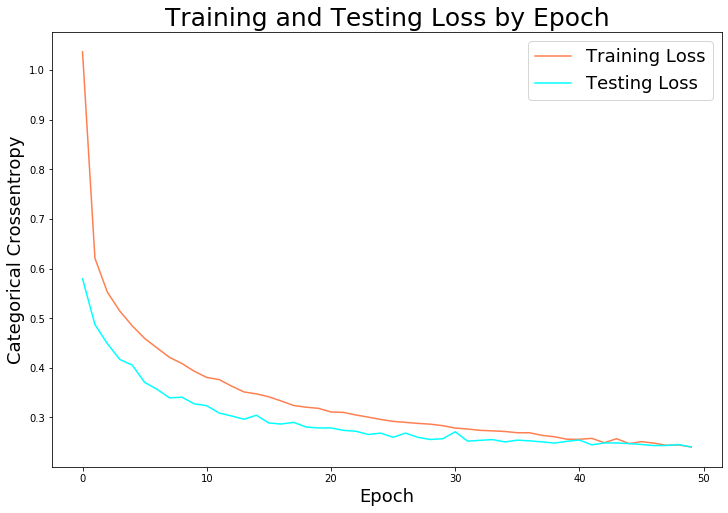

In [47]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='coral')
plt.plot(test_loss, label='Testing Loss', color='aqua')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
# plt.xticks([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])

plt.legend(fontsize = 18);

In [48]:
y_pred = cnn_model.predict_classes(X_test)


## Scratch Work


In [104]:
corr_map = pd.DataFrame(y_pred)
corr_map.head(10)

,0
0,7
1,8
2,8
3,5
4,9
5,1
6,2
7,3
8,6
9,2


In [105]:
corr_map[0].value_counts()

4    1900
7    1871
3    1850
0    1808
2    1791
9    1785
6    1769
1    1759
8    1751
5    1716
Name: 0, dtype: int64

In [106]:
y_test.shape

(18000, 10)

In [107]:
y_pred.shape

(18000,)

In [165]:
corr_map['actual_preds'] = np.argmax(y_test, axis = 1)

In [166]:
corr_map['actual_preds'].value_counts()

6    1846
7    1841
3    1822
2    1814
4    1805
1    1795
9    1794
0    1783
8    1762
5    1738
Name: actual_preds, dtype: int64

In [169]:
confusion_matrix(y_pred, corr_map['actual_preds'])

array([[1549,    2,   20,   31,    3,    1,  196,    0,    6,    0],
       [   1, 1747,    0,    6,    2,    0,    2,    0,    1,    0],
       [  32,    0, 1561,    6,   60,    0,  129,    0,    3,    0],
       [  29,   34,   21, 1673,   54,    2,   34,    0,    3,    0],
       [   4,    4,  109,   63, 1576,    0,  141,    0,    3,    0],
       [   0,    0,    0,    0,    1, 1693,    1,   14,    2,    5],
       [ 160,    6,  102,   41,  109,    0, 1335,    0,   16,    0],
       [   0,    0,    0,    0,    0,   29,    0, 1795,    0,   47],
       [   8,    2,    1,    2,    0,    0,    8,    1, 1728,    1],
       [   0,    0,    0,    0,    0,   13,    0,   31,    0, 1741]])

In [124]:
corr_map = pd.get_dummies(corr_map, columns=['actual_preds'])
corr_map.head()

,0,actual_preds_0,actual_preds_1,actual_preds_2,actual_preds_3,actual_preds_4,actual_preds_5,actual_preds_6,actual_preds_7,actual_preds_8,actual_preds_9
0,7,0,0,0,0,0,0,0,1,0,0
1,8,0,0,0,0,0,0,0,0,1,0
2,8,0,0,0,0,0,0,0,0,1,0
3,5,0,0,0,0,0,1,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,1


In [125]:
corr_map.head()

,0,actual_preds_0,actual_preds_1,actual_preds_2,actual_preds_3,actual_preds_4,actual_preds_5,actual_preds_6,actual_preds_7,actual_preds_8,actual_preds_9
0,7,0,0,0,0,0,0,0,1,0,0
1,8,0,0,0,0,0,0,0,0,1,0
2,8,0,0,0,0,0,0,0,0,1,0
3,5,0,0,0,0,0,1,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,1


In [138]:
score = corr_map['actual_preds_0'].groupby(corr_map[0])

In [148]:
score_0 = pd.DataFrame(score)
score_0.head(10)


,0,1
0,0,11 1 15 1 23 1 27 1 28...
1,1,5 0 13 0 19 0 26 0 30...
2,2,6 0 9 0 20 0 32 0 40...
3,3,7 0 21 0 34 0 51 0 60...
4,4,35 0 38 0 46 0 47 0 62...
5,5,3 0 10 0 29 0 45 0 53...
6,6,8 0 14 0 16 0 17 0 24...
7,7,0 0 12 0 33 0 83 0 95...
8,8,1 0 2 0 22 0 39 0 54...
9,9,4 0 18 0 25 0 36 0 37...


In [155]:
score_0[1].sum().sum()

0.0

0     7
1     8
2     8
3     5
4     9
5     1
6     2
7     6
8     6
9     2
10    5
11    0
12    7
13    1
14    6
15    0
16    6
17    2
18    9
19    1
20    2
21    4
22    8
23    0
24    4
25    9
26    1
27    0
28    0
29    5
30    1
32    2
33    7
34    3
35    4
36    9
37    9
38    4
39    8
40    2
45    5
46    4
47    4
51    3
53    5
54    8
60    3
62    3
83    7
95    7
Name: actual_preds, dtype: int64

In [161]:
corr_map

,0,actual_preds_0,actual_preds_1,actual_preds_2,actual_preds_3,actual_preds_4,actual_preds_5,actual_preds_6,actual_preds_7,actual_preds_8,actual_preds_9
0,7,0,0,0,0,0,0,0,1,0,0
1,8,0,0,0,0,0,0,0,0,1,0
2,8,0,0,0,0,0,0,0,0,1,0
3,5,0,0,0,0,0,1,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,1
5,1,0,1,0,0,0,0,0,0,0,0
6,2,0,0,1,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,1,0,0,0
8,6,0,0,0,0,0,0,1,0,0,0
9,2,0,0,1,0,0,0,0,0,0,0


In [99]:
Total = corr_map.groupby[0].sum()

TypeError: 'method' object is not subscriptable

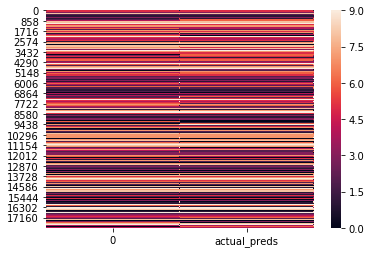

In [77]:
sns.heatmap(corr_map)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 50)        500       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        7216      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               51328     
__________

In [156]:
data['label'].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64